# Simulation results summary

Summary of some results from simulation studies for a group meeting demonstration.

## Numerical studies of M&M credible sets

In [1]:
%cd ~/GIT/github/mnm-twas/dsc/finemap_output

/home/gaow/Documents/GIT/github/mnm-twas/dsc/finemap_output

> finemap_output_comparisons.png (188.4 KiB):

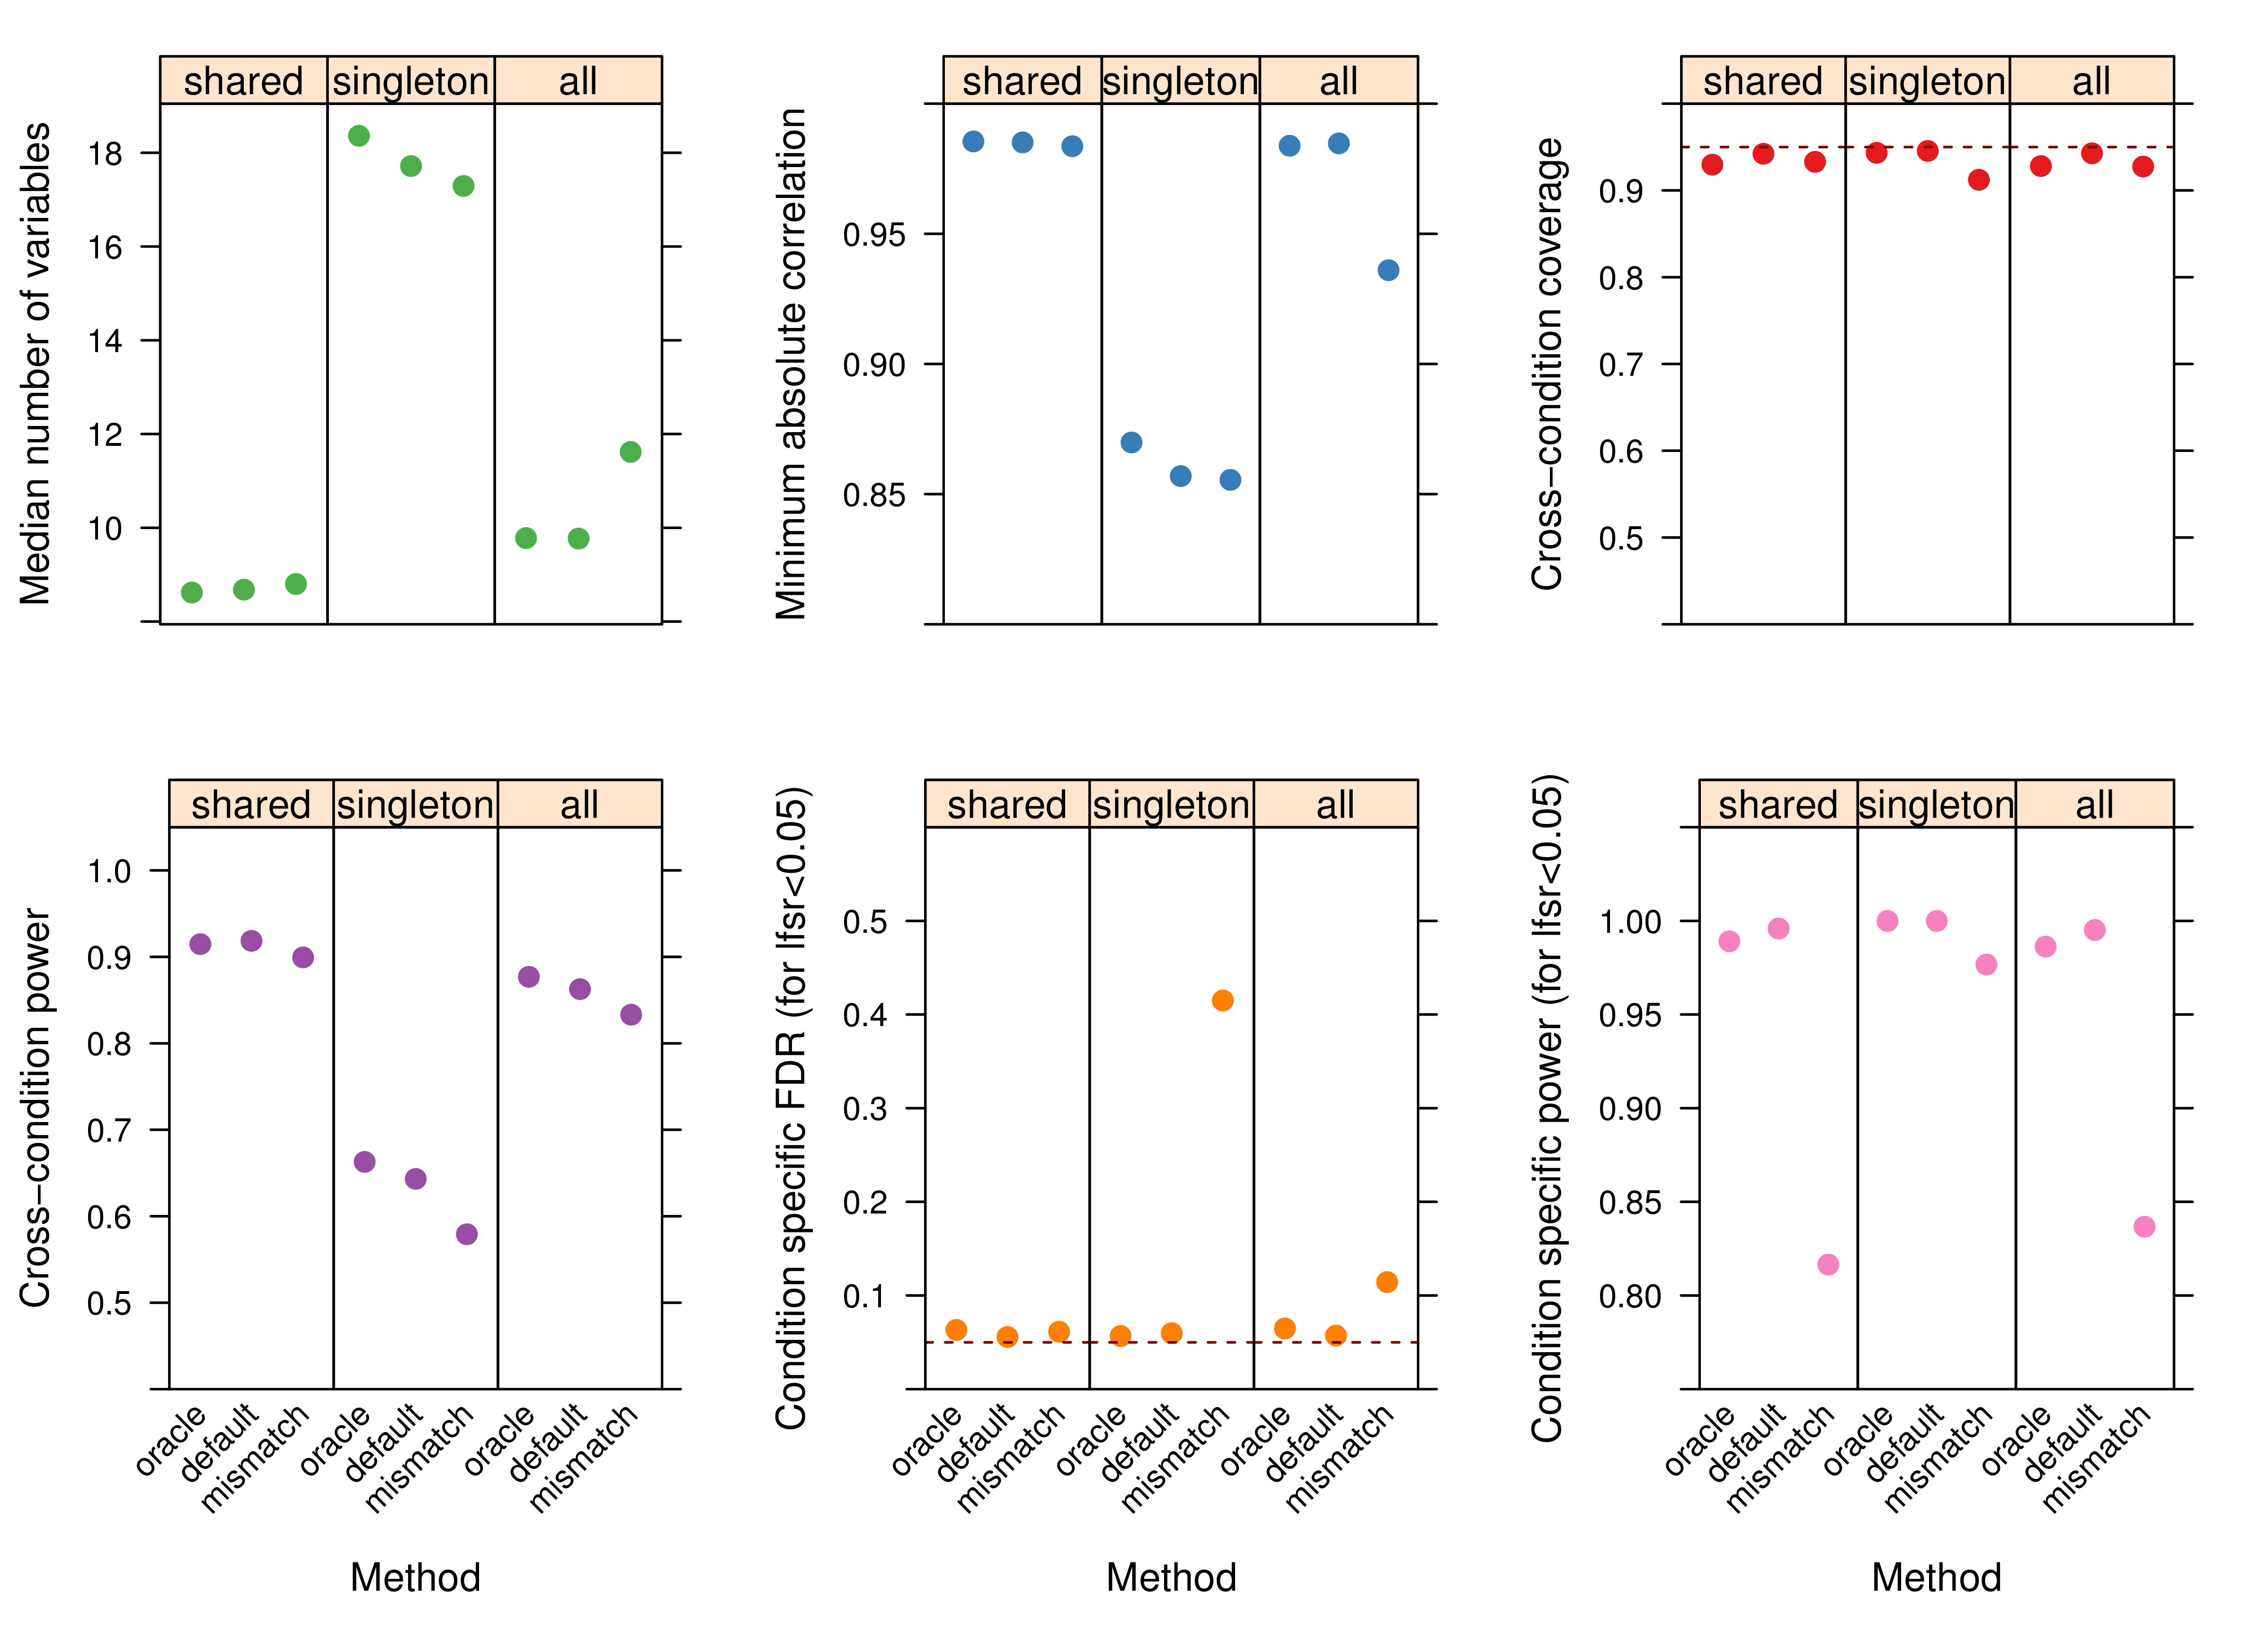

In [2]:
%preview finemap_output_comparisons.png --width 90%

## Comparison with MT-HESS 

### precision-recall curve

Variable-level condition specific lfsr for M&M vs PIP for MT-HESS.

In [3]:
%cd ~/GIT/github/mnm-twas/dsc/mthess_500

/home/gaow/Documents/GIT/github/mnm-twas/dsc/mthess_500

> PIP_comparison_0228.roc.pdf (14.5 KiB):

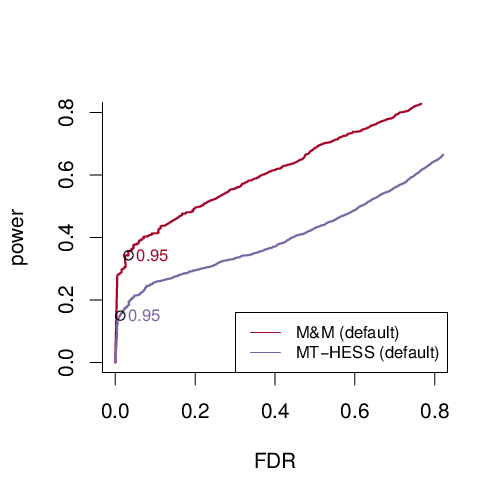

In [4]:
%preview PIP_comparison_0228.roc.pdf -s png --dpi 100

### Speed comparison


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Warning message:
“Removed 3 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”

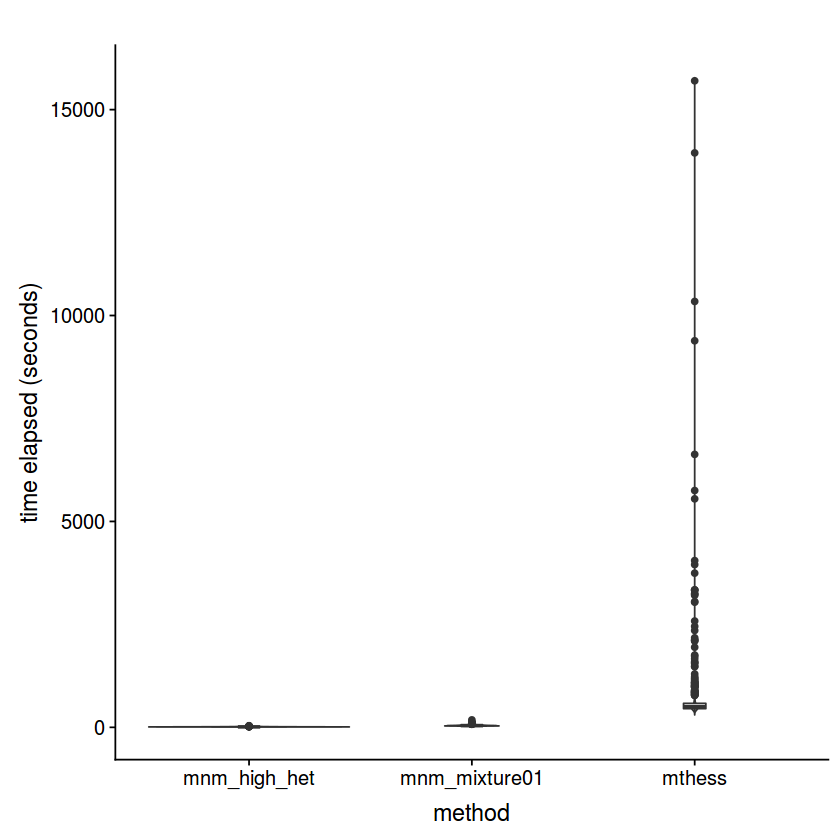

In [5]:
dat = readRDS('PIP_comparison_0228.pips_meta.rds')
dat = dat[,c(4,6)]
colnames(dat) = c('method', 'time')
library(ggplot2)
library(cowplot)
# Basic violin plot
p = ggplot(dat, aes(x=method, y=time)) + 
  geom_violin(trim=FALSE, fill="gray")+
  labs(title="",x="method", y = "time elapsed (seconds)")+
  geom_boxplot(width=0.1)+
  theme_cowplot()
print(p)

## Demonstration of multivariate analysis output

Software package: 

https://github.com/gaow/mvsusieR

In [6]:
%cd ~/GIT/software/mvsusieR/inst/prototypes/

/home/gaow/Documents/GIT/software/mvsusieR/inst/prototypes

### Load data

In [7]:
result_file = 'small_data_100_mixture01_1_oracle_generator_1_mnm_mixture01_1.rds'
meta_file = 'small_data_100_mixture01_1.pkl'
X_file = 'small_data_100.rds'

In [8]:
dat = readRDS(result_file)$result
rownames(dat$coef) = NULL
meta = dscrutils::read_dsc(meta_file)
Y = meta$Y
X = readRDS(X_file)$X

### Run univariate analysis

Per SNP per condition, for a comparison.

In [9]:
univariate_res = lapply(1:ncol(Y), function(i) susieR:::univariate_regression(X,Y[,i]))
dat$bhat = do.call(cbind, lapply(1:ncol(Y), function(i) univariate_res[[i]]$betahat))
dat$shat = do.call(cbind, lapply(1:ncol(Y), function(i) univariate_res[[i]]$sebetahat))

### SuSiE plot on credible sets

In [10]:
truth = meta$meta$true_coef
true_variable = unique(which(truth!=0,arr.ind=T)[,1])
cbind(true_variable, truth[true_variable,])

true_variable,,,,,
149,0.4118993,0.3934502,0.08806096,-0.07230793,0.05004165
394,0.4118993,0.3934502,0.08806096,-0.07230793,0.05004165
786,0.4118993,0.3934502,0.08806096,-0.07230793,0.05004165


In [11]:
pdf('susie_plot_demo.pdf', width=10, height=5)
susieR::susie_plot(dat,y='PIP', main = 'Default SuSiE plot for cross-condition PIP', xlab = 'SNP positions', add_legend = T, b=as.integer(apply(truth, 1, sum) != 0))
dev.off()

png 
  2

> susie_plot_demo.pdf (11.0 KiB):

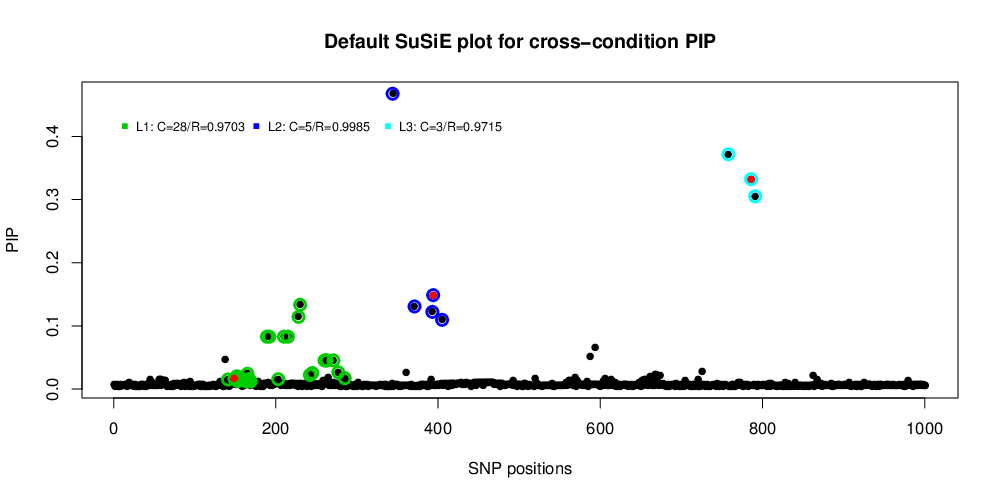

In [12]:
%preview susie_plot_demo.pdf -s png --dpi 100

### GTEx-like bubble plot for MV-SuSiE results

In [13]:
p = mvsusieR::mvsusie_plot(dat)

Suggested PDF canvas width: 18 height: 4.5 


In [14]:
pdf('bubble_demo.pdf', width = p$width, height = p$height)
print(p$plot)
dev.off()

png 
  2

> bubble_demo.pdf (6.4 KiB):

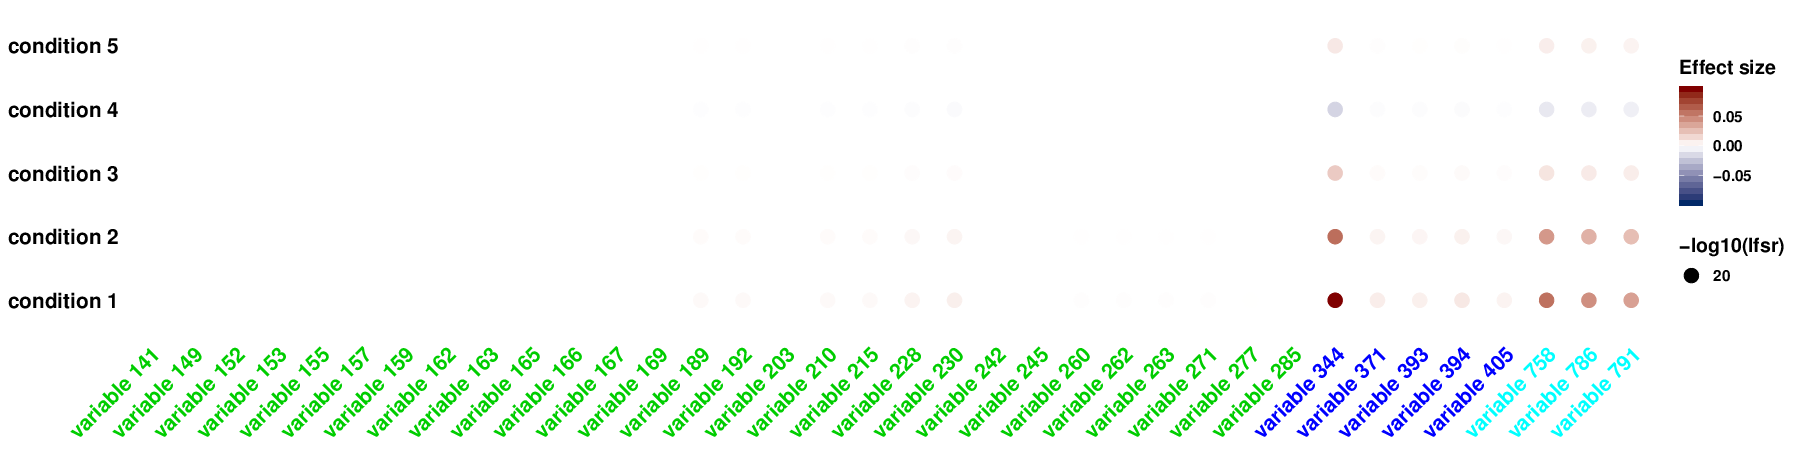

In [15]:
%preview bubble_demo.pdf -s png --dpi 100

In [16]:
p = mvsusieR::mvsusie_plot(dat, cs_only=F)

Suggested PDF canvas width: 500.5 height: 4.5 


In [17]:
pdf('bubble_demo_full.pdf', width = p$width, height = p$height)
print(p$plot)
dev.off()

png 
  2

> bubble_demo_z_full.pdf (87.4 KiB):

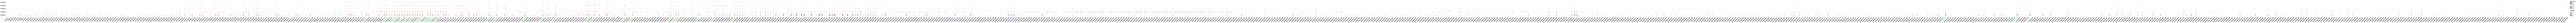

In [18]:
%preview bubble_demo_z_full.pdf -s png --dpi 100

### Comparison to original summary statistics

In [19]:
p = mvsusieR::mvsusie_plot(dat, original_sumstat = TRUE)

Suggested PDF canvas width: 18 height: 4.5 


In [20]:
pdf('bubble_demo_z.pdf', width = p$width, height = p$height)
print(p$plot)
dev.off()

png 
  2

> bubble_demo_z.pdf (8.0 KiB):

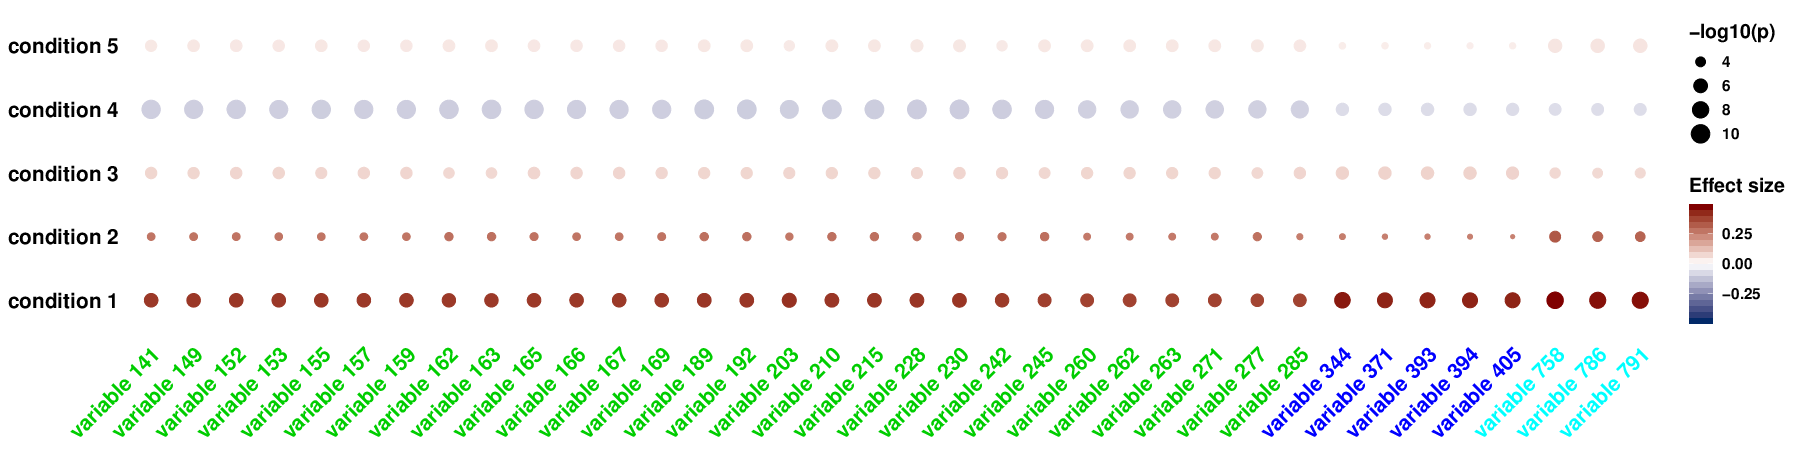

In [21]:
%preview bubble_demo_z.pdf -s png --dpi 100

In [22]:
p = mvsusieR::mvsusie_plot(dat, original_sumstat = TRUE, cs_only = FALSE)

Suggested PDF canvas width: 500.5 height: 4.5 


In [23]:
pdf('bubble_demo_z_full.pdf', width = p$width, height = p$height)
print(p$plot)
dev.off()

png 
  2

> bubble_demo_z_full.pdf (87.4 KiB):

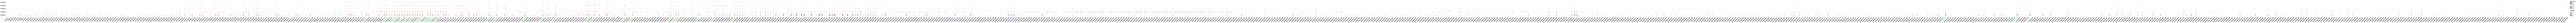

In [24]:
%preview bubble_demo_z_full.pdf -s png --dpi 100